# Shoes Number
> Number of shoes according to 25 extracted colors.


[Back to <b>contents</b>](../README.md)

In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np

def load_shoe_data(filename):
  class ShoeData:
    data = []
    feature_names = ['Name','Brand','Colors','Link','wish','review']
  shoes = ShoeData()
  with open(filename,'r', encoding ='utf-8') as f:
    for items in csv.reader(f):
      if items[0].startswith('#'): continue
      shoes.data.append(items)
    shoes.data = np.array(shoes.data)
    return shoes

shoes = load_shoe_data('../data/shoes(updated).csv')

Get color information of shoes through [shoes(updated).csv](../data/shoes.csv).

Since the number of shoes is not evenly distributed by color, the number is displayed on a log scale.

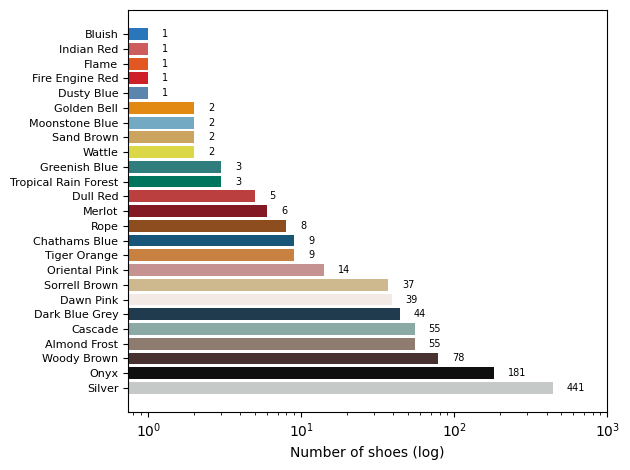

In [3]:

nums = {}
rgb = {}
rgbs = []

filename = '../data/main_colors.csv'
with open(filename,'r',encoding= 'utf-8') as f:
  for items in csv.reader(f):
    colorName = items[0]
    if colorName .startswith('#'): continue
    rgb[colorName] = np.array(eval(items[1]))/255
    nums[colorName] = 0

for shoe in shoes.data:
  colorName = eval(shoe[2])['name']
  nums[colorName] += 1
nums = dict(sorted(nums.items(),key = lambda x:x[1],reverse=True))
labels = list(nums.keys())
ratio = list(nums.values())
for name in labels: rgbs.append(rgb[name])

fig,ax = plt.subplots()
index = np.arange(25)
hbars = plt.barh(range(25), ratio, color=rgbs)
ax.set_yticks(index,labels,fontsize = 8)
ax.set_xscale("log")
ax.bar_label(hbars,padding=10,fontsize=7)
ax.set_xlim(right=10**3)
ax.set_xlabel('Number of shoes (log)')
fig.tight_layout()
plt.show()

[Back to <b>contents</b>](../README.md)